In [3]:
library(RColorBrewer)
library(ComplexHeatmap)
library(circlize)
library(gprofiler2)

In [44]:
DA = c('NR4A2', 'ATP13A2', 'PBX1', 'LMO3',  'ZFP69B', 'TMCC3')
Prolif = c('MKI67', 'TOP2A', 'KIAA1524')
NP = c('LIX1', 'RAX', 'NR2F1', 'NES')
markers = c(DA, Prolif, NP)
Sert = c('CHGB', 'DDC','FEV','GATA2', 'GATA3', 'GCH1', 'GCHFR', 'HTR1A','HTR1B',
                 'MAOA','MAOB','SLC18A2','SLC29A4','SLC6A4','TPH2')
Neuron = c('SYT1', 'SNAP25')
# markers = c(Sert, Neuron)
DA_all = c('ABCC8','ACOT7','ALDH1A1','AMER3','ARG2','ASB4','BNC2','CADPS2','CALB1','CALB2','CAMK2N1',
            'CCK','CDK14','CDKN1C','CHL1','CHRNA4','CPEB3',
#            'CXCR4',
           'DCC','DKK3','DRD2',
            'EBF2','EN1','EN2','EPHA5','ERC2','FGF13',
#            'FOXA1',
           'FOXA2','GDAP1','GFRA1','GRIA3','GRIK3',
            'GRP','ICA1L','IGF1','KCNIP4','KCNJ6','KLHL1','KLHL13','LGI1','LMO3','LMX1A','LMX1B',
            'LRRC3B','LRRTM2','LSAMP','LY6H','NETO2','NR4A2','NTSR1','OTX2','PBX1','PRICKLE2','PRKCA',
            'PRL','PRRT4','PITX3','PTPN5','PTPRO','RET','SCG2',
#             'SLC10A4','SLC18A1','SLC18A2','SLC18A3','SLC6A3',
           'SNCA',
#            'SOX6',
           'TH','TMCC3','TMEFF2','TMEM255A','TUB','VGF')
genes = DA_all
# genes = DA

In [45]:
# DA_develop = c('LMX1A','OTX2')
# DA_mature = c("VGF","TH","DBH")
# genes = c(DA_develop, DA_mature)

In [46]:
# # load cluster summaries
# cluster_summaries = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/genetic_effect/scaled_absolute_eff_sizes_20mofas_as_spatial_downsample_50pct_cluster_summaries.csv", row.names=1)
# colnames(cluster_summaries) = paste0("cluster",0:(ncol(cluster_summaries)-1))
# head(cluster_summaries,2)

In [47]:
# expression file 
# input_files_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/input_files/"
# phenotype_file = paste0(input_files_dir,"phenotype.csv")
# df0 = read.csv(phenotype_file, row.names=1)
# newcols = gsub("\\.","-",colnames(df0))
# colnames(df0) = newcols
# df1 = df0[,rownames(cluster_summaries)]

In [48]:
mat = matrix(0,nrow = length(genes), ncol = ncol(cluster_summaries))
rownames(mat) = genes
colnames(mat) = colnames(cluster_summaries)
for (cluster in 0:11){
    for (gene in genes){
        mat[gene,cluster+1] = cor(as.numeric(df1[gene,]), cluster_summaries[,cluster+1])
    }
}

In [49]:
mat

,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11
ABCC8,0.065528824,0.185324168,-0.004472231,-0.1801187370,0.068840634,0.01774502,-0.026060755,0.018045870,-0.075979696,-0.008318472,0.2016717724,-0.024277855
ACOT7,0.300501222,-0.202377243,-0.638128669,0.3636630562,0.388008358,0.09659413,0.583200741,-0.037767200,-0.100457260,0.572361552,-0.0827612297,0.428786753
ALDH1A1,0.028571637,0.284617930,0.060982060,-0.2093336939,-0.053110085,0.13084110,-0.133640193,-0.121478468,-0.164636924,-0.062271007,0.2554221193,-0.059481374
AMER3,0.008671501,-0.103448291,-0.153045591,0.0522786043,0.380202520,-0.29293054,0.268969515,0.341884666,0.064571180,0.080248980,0.0682029544,0.105691555
ARG2,0.289265672,-0.139222189,-0.553249800,0.2485075159,0.408110398,0.07489207,0.485898861,-0.007208245,-0.193488907,0.500521968,0.0173956022,0.401432074
ASB4,-0.032280571,0.370234626,0.311679784,-0.4478332500,-0.115216589,0.06426195,-0.355152914,-0.022053088,-0.149139275,-0.275726156,0.3270692637,-0.264682442
BNC2,-0.065941059,0.097358789,0.264158546,-0.2476003063,-0.041191196,-0.13814391,-0.219470967,0.161983063,0.096911062,-0.256258678,0.0949383016,-0.298551780
CADPS2,0.032531702,0.261456883,0.081107418,-0.2033136693,-0.054250161,0.04583212,-0.067463263,-0.036928207,-0.084316637,-0.100868613,0.1653697717,-0.081166044
CALB1,0.060607876,0.020102993,-0.134576309,0.0287587561,0.079345353,0.07899394,0.133595928,-0.031448355,-0.201862142,0.099771424,-0.0153514039,0.148157071
CALB2,0.335865367,0.018529218,-0.436117699,0.1885804639,0.092398284,0.36047741,0.245479514,-0.319671917,-0.262635952,0.459295647,-0.0364062466,0.366379945


In [50]:
options(repr.plot.width = 15, repr.plot.height = 10)
# Heatmap(mat, col = colorRamp2(c(-1, 0, 1), c("royalblue", "white", "tomato")))

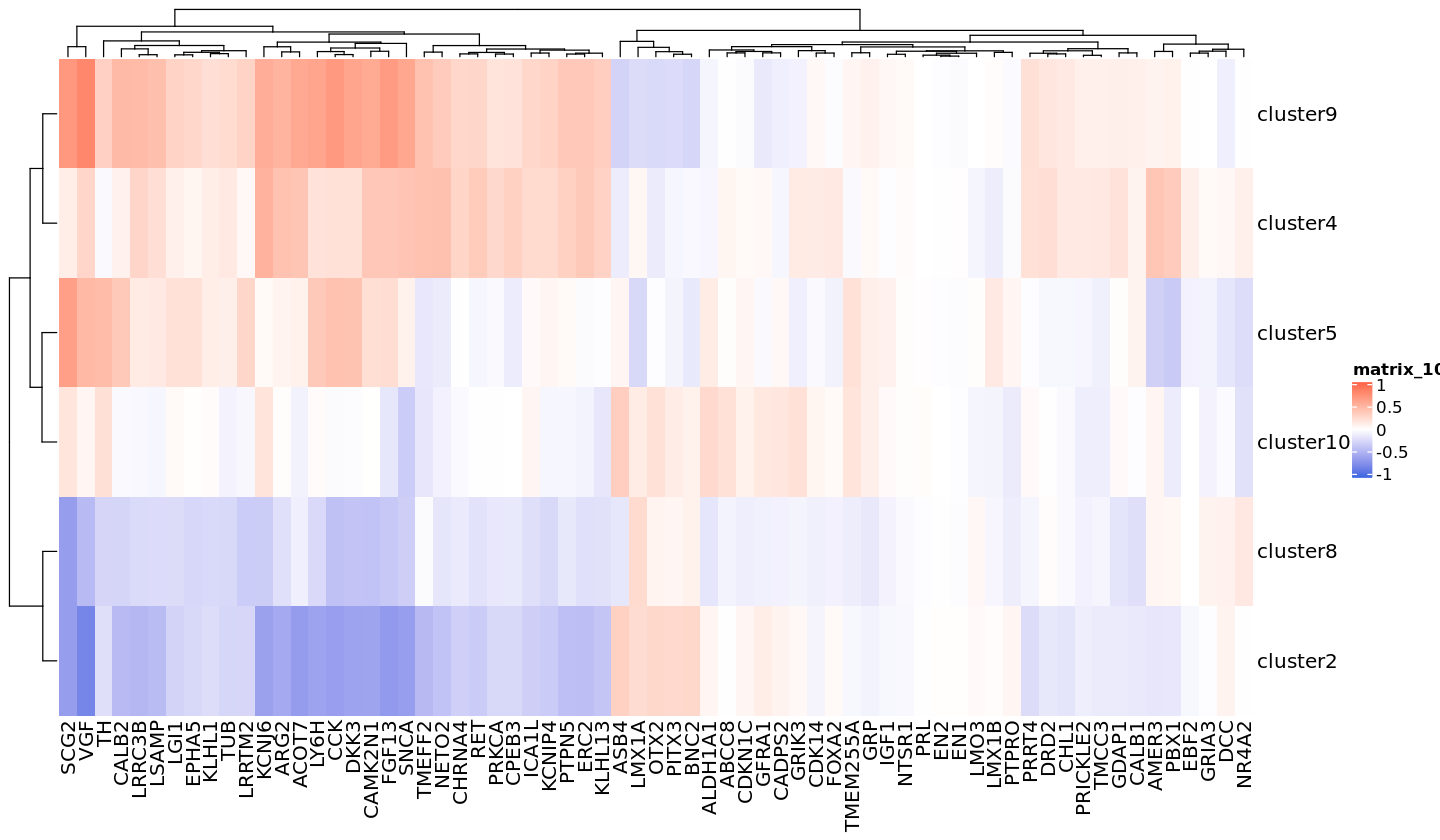

In [51]:
mat0 = mat[,c("cluster5", "cluster2","cluster4","cluster9","cluster10","cluster8")]
options(repr.plot.width = 12, repr.plot.height = 7)
Heatmap(t(mat0), col = colorRamp2(c(-1, 0, 1), c("royalblue", "white", "tomato")))

In [62]:
drop_cols = c()
for (i in 1:nrow(mat)){
    if (sum(abs(mat[i,])>0.5)==0){
        drop_cols = c(drop_cols, rownames(mat)[i])
    }
}
drop_cols

[1] "ABCC8"    "ALDH1A1"  "AMER3"    "ASB4"     "BNC2"     "CADPS2"  
 [7] "CALB1"    "CALB2"    "CDK14"    "CDKN1C"   "CHL1"     "CHRNA4"  
[13] "CPEB3"    "DCC"      "DRD2"     "EBF2"     "EN1"      "EN2"     
[19] "EPHA5"    "ERC2"     "FOXA2"    "GDAP1"    "GFRA1"    "GRIA3"   
[25] "GRIK3"    "GRP"      "ICA1L"    "IGF1"     "KCNIP4"   "KLHL1"   
[31] "KLHL13"   "LGI1"     "LMO3"     "LMX1A"    "LMX1B"    "LRRC3B"  
[37] "LRRTM2"   "LSAMP"    "NETO2"    "NR4A2"    "NTSR1"    "OTX2"    
[43] "PBX1"     "PRICKLE2" "PRKCA"    "PRL"      "PRRT4"    "PITX3"   
[49] "PTPN5"    "PTPRO"    "RET"      "TH"       "TMCC3"    "TMEFF2"  
[55] "TMEM255A" "TUB"

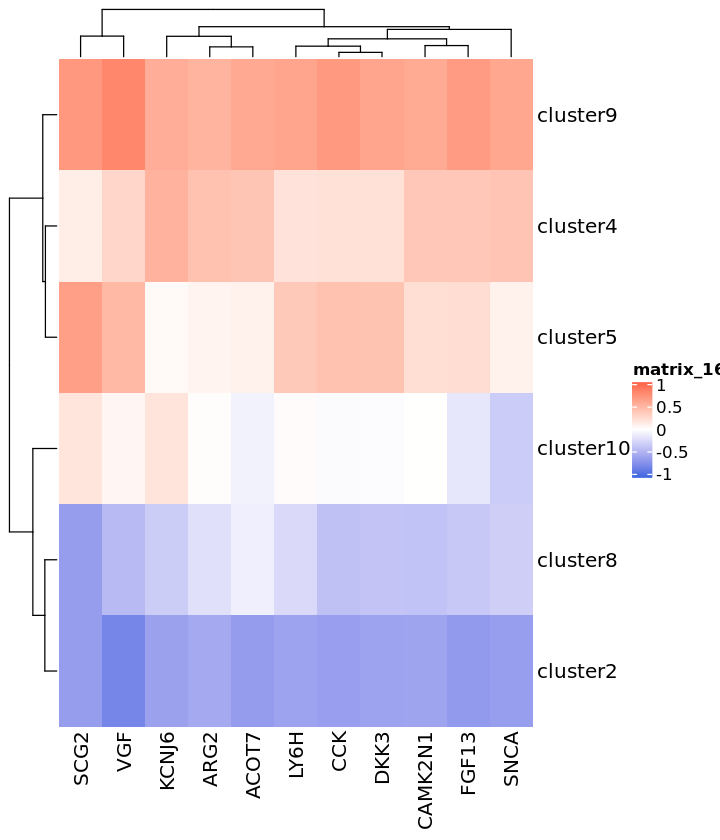

In [64]:
mat1 = mat[!(rownames(mat) %in% drop_cols),c("cluster5", "cluster2","cluster4","cluster9","cluster10","cluster8")]
options(repr.plot.width = 6, repr.plot.height = 7)
Heatmap(t(mat1), col = colorRamp2(c(-1, 0, 1), c("royalblue", "white", "tomato")))

In [39]:
genes = names(mat0[,"cluster4"][order(mat0[,"cluster4"])])
# genes
gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=TRUE)
gres$result

query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
query_1,TRUE,1.136503e-12,1735,70,33,0.4714286,0.019020173,GO:0007267,GO:BP,cell-cell signaling,18123,3171,"GO:0007154, GO:0023052"
query_1,TRUE,6.200572e-11,38,44,8,0.1818182,0.210526316,GO:0071542,GO:BP,dopaminergic neuron differentiation,18123,19611,GO:0030182
query_1,TRUE,4.954508e-10,190,53,12,0.2264151,0.063157895,GO:0007626,GO:BP,locomotory behavior,18123,3499,GO:0007610
query_1,TRUE,7.860888e-09,747,70,20,0.2857143,0.026773762,GO:0099536,GO:BP,synaptic signaling,18123,22390,GO:0007267
query_1,TRUE,1.324165e-08,589,70,18,0.2571429,0.030560272,GO:0007610,GO:BP,behavior,18123,3483,GO:0008150
query_1,TRUE,2.004922e-08,1427,66,25,0.3787879,0.017519271,GO:0030182,GO:BP,neuron differentiation,18123,7753,"GO:0030154, GO:0048699"
query_1,TRUE,2.012981e-08,1698,66,27,0.4090909,0.015901060,GO:0022008,GO:BP,neurogenesis,18123,7567,"GO:0007399, GO:0030154"
query_1,TRUE,2.530536e-08,1576,66,26,0.3939394,0.016497462,GO:0048699,GO:BP,generation of neurons,18123,15044,GO:0022008
query_1,TRUE,3.315937e-08,713,70,19,0.2714286,0.026647966,GO:0098916,GO:BP,anterograde trans-synaptic signaling,18123,22221,GO:0099537
query_1,TRUE,3.315937e-08,713,70,19,0.2714286,0.026647966,GO:0007268,GO:BP,chemical synaptic transmission,18123,3172,GO:0098916
